<a href="https://colab.research.google.com/github/ramanath-naik/machine_learning/blob/main/polynomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print(X[0])

X_poly[0]

[-0.21011602]


array([-0.21011602,  0.04414874])

In [4]:
0.21011602*0.21011602

0.0441487418606404

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.96511881]), array([[0.91437773, 0.48643359]]))

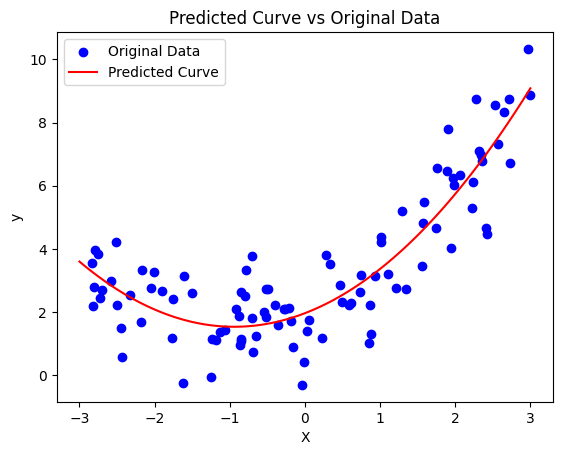

In [8]:
import matplotlib.pyplot as plt

X_new = np.linspace(-3, 3, 100).reshape(-1, 1)
X_new_poly = poly_features.transform(X_new)

y_new = lin_reg.predict(X_new_poly)

plt.scatter(X, y, color='blue', label='Original Data')

plt.plot(X_new, y_new, color='red', label='Predicted Curve')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Predicted Curve vs Original Data')
plt.show()

Learning Curves

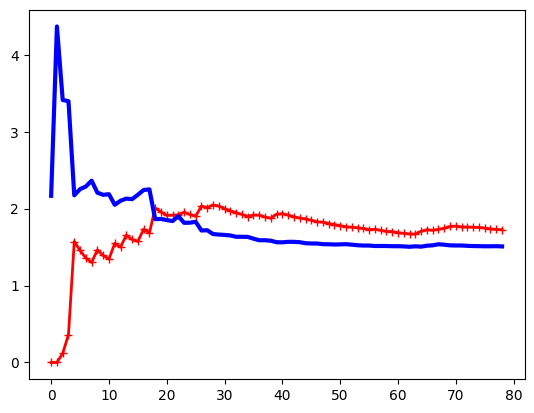

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")


lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

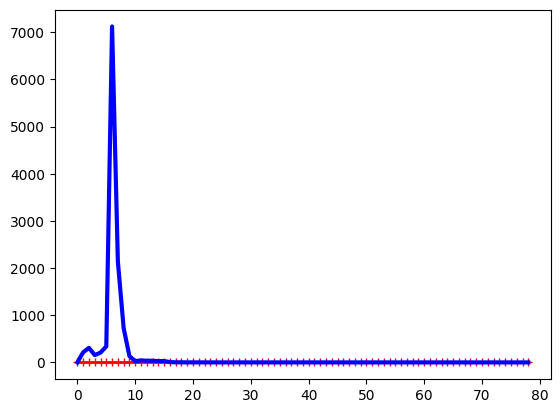

In [10]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)